# COE782- ML - Lista2 -Parte prática - E1

## Inferência Baysiana Sequencial

Vivian de Carvalho Rodrigues

DRE:125228569

In [1]:
#Referências:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html#scipy.stats.beta
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom

import numpy as np
from scipy.stats import beta, binom
import matplotlib.pyplot as plt

In [2]:
#Distribuição Beta
a = [0.1, 1, 2, 8]
b = [0.1, 1, 3, 4]

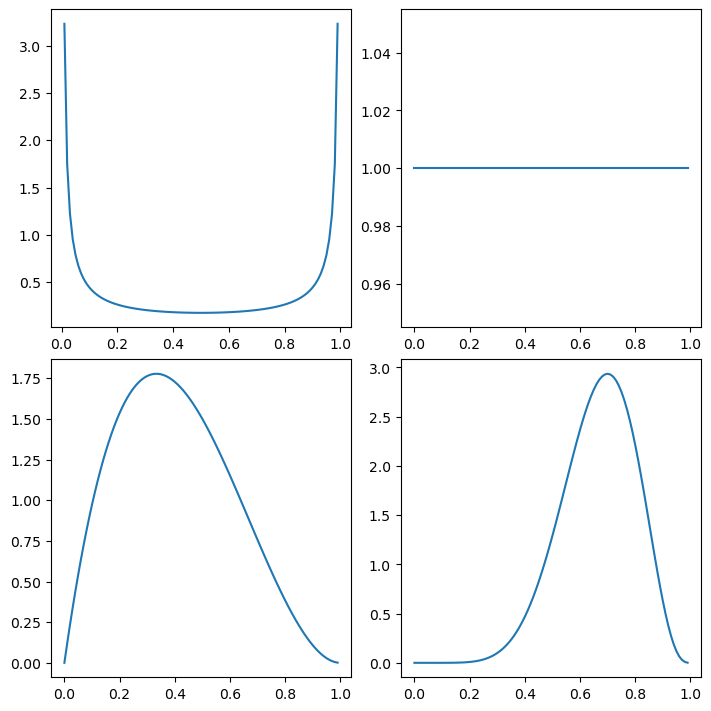

In [3]:
#fig 2.2 do Bishop
Nx = 100
mub = np.arange(0., 1., 1/Nx).reshape(Nx,1)

fig, axs = plt.subplots(2, 2, figsize=(7, 7), layout='constrained')

axs[0,0].plot(mub, beta.pdf(mub, a[0], b[0]))
axs[0,1].plot(mub, beta.pdf(mub, a[1], b[1]))
axs[1,0].plot(mub, beta.pdf(mub, a[2], b[2]))
axs[1,1].plot(mub, beta.pdf(mub, a[3], b[3]))
plt.show()

In [4]:
#distribuição binomial
N, mu = 10, 0.25
m = np.arange(11)

fbin = []

fbin += [binom.pmf(i, N, mu) for i in range(len(m))]

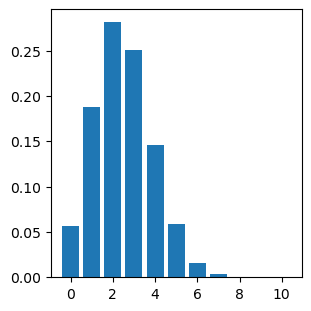

In [5]:
#fig 2.1 do Bishop
fig, axs = plt.subplots(1, 1, figsize=(3, 3), layout='constrained')
axs.bar(m, fbin)
plt.show()

In [6]:
#exemplo da figura 2.3 Bishop
N = 1                             #1 jogada apenas
mu_b = np.arange(0., 1., 1/Nx)

a= 2
b= 2

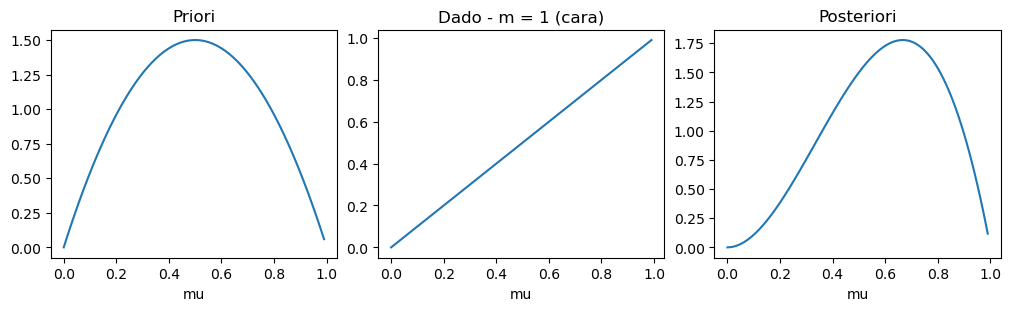

In [7]:
#Cara = 1 (1 jogada)
m = N    #no exemplo m = 1 (cara = 1 por exemplo)
fpri= []                           #priori
lh = []                            #verossimilhança
fpos = []                          #posteriori
prob = 0.5                         #probabilidade de cara/coroa (denominador)

fpri += [beta.pdf(mu_b[i], a, b) for i in range(len(mu_b))]
lh += [binom.pmf(m, N, mu_b[i]) for i in range(len(mu_b))]
fpos += [binom.pmf(m, N, mu_b[i])*beta.pdf(mu_b[i], a, b)/prob for i in range(len(mu_b))]


#fig 2.3 do Bishop
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(10, 3), layout='constrained')
ax1.plot(mu_b, fpri)
ax1.set_xlabel("mu")  
ax1.set_title("Priori")

ax2.plot(mu_b,lh)
ax2.set_xlabel("mu")  
ax2.set_title("Dado - m = 1 (cara)")


ax3.plot(mu_b, fpos)
ax3.set_xlabel("mu")  
ax3.set_title("Posteriori")

plt.show()

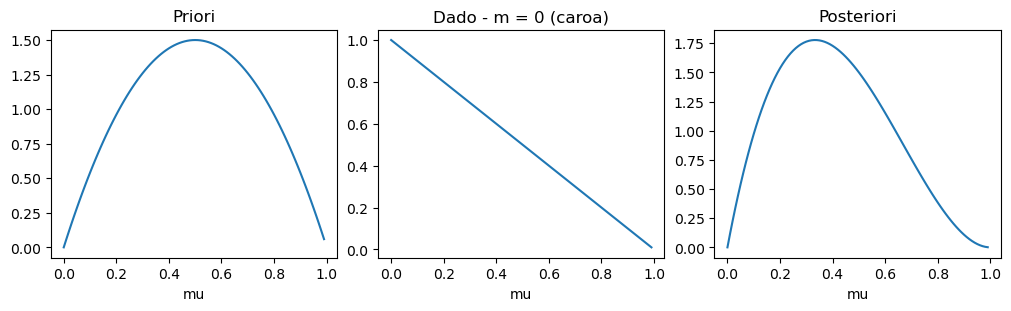

In [8]:
#Coroa = 0 (1 jogada)
m = 0
fpri= []                           #priori
lh = []                            #verossimilhança
fpos = []                          #posteriori
prob = 0.5                         #probabilidade de cara/coroa (denominador - p(x))

fpri += [beta.pdf(mu_b[i], a, b) for i in range(len(mu_b))]
lh += [binom.pmf(m, N, mu_b[i]) for i in range(len(mu_b))]
fpos += [binom.pmf(m, N, mu_b[i])*beta.pdf(mu_b[i], a, b)/prob for i in range(len(mu_b))]


#fig 2.3 do Bishop adaptado
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(10, 3), layout='constrained')
ax1.plot(mu_b, fpri)
ax1.set_xlabel("mu")  
ax1.set_title("Priori")

ax2.plot(mu_b,lh)
ax2.set_xlabel("mu")  
ax2.set_title("Dado - m = 0 (caroa)")

ax3.plot(mu_b, fpos)
ax3.set_xlabel("mu")  
ax3.set_title("Posteriori")

plt.show()

In [9]:
#gera as jogadas (Dado m) com distribuição Bernoulli
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.geometric.html

m = np.random.default_rng().geometric(p=0.7, size=5)
for i in range(len(m)):
    if m[i] > 1:
        m[i] = 0
m

array([1, 1, 0, 0, 1], dtype=int64)

In [10]:
len(m)

5

Jogada 1 com resultado = 1


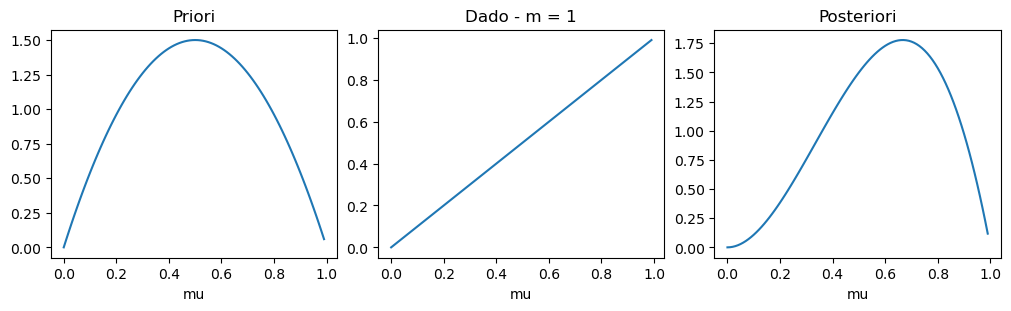

Jogada 2 com resultado = 1


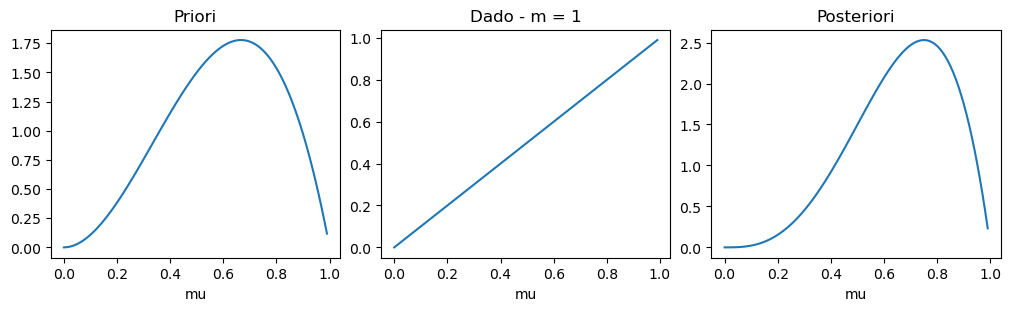

Jogada 3 com resultado = 0


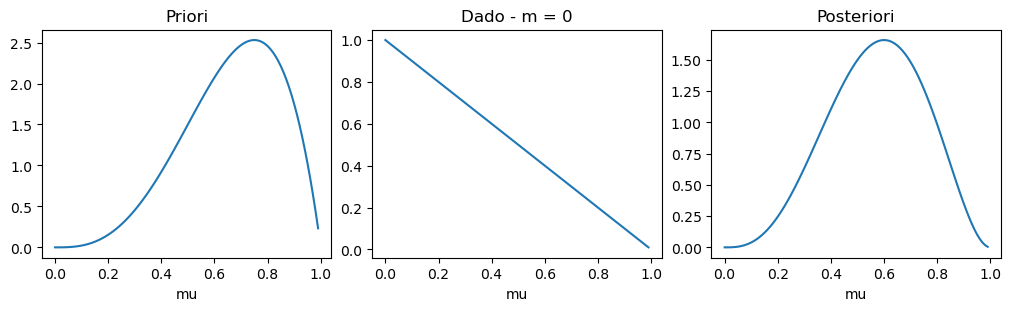

Jogada 4 com resultado = 0


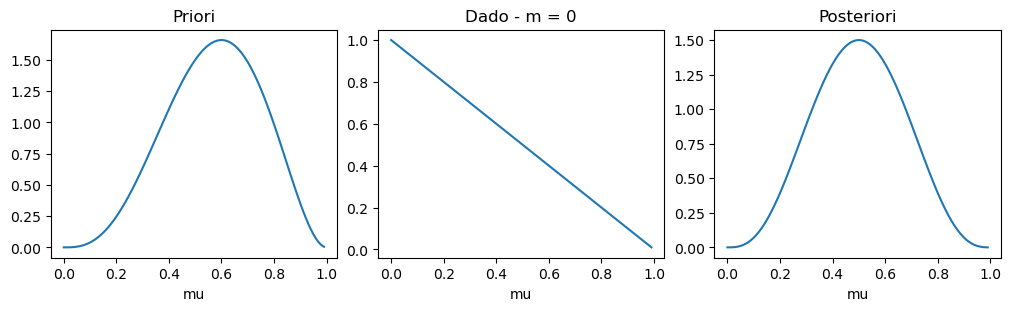

Jogada 5 com resultado = 1


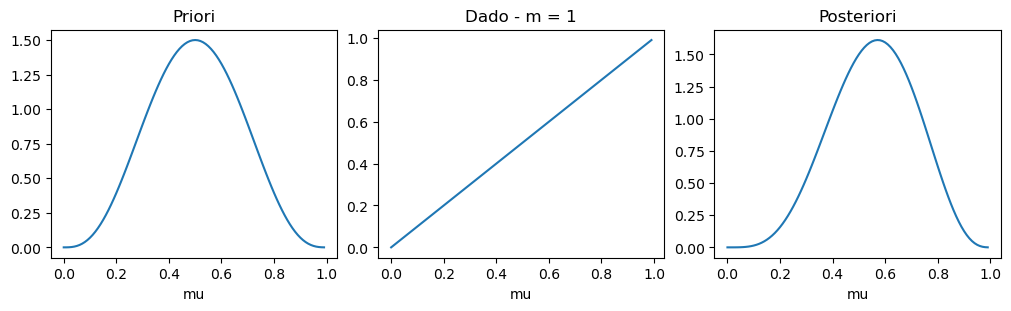

In [11]:
#Considerando 5 jogadas aleatórias
fpri= []                           #priori
lh = []                            #verossimilhança
fpos = []                          #posteriori
prob = 0.5                         #probabilidade de cara/coroa (denominador - p(x))


for k in range (len(m)):
    if k == 0:
        fpri += [beta.pdf(mu_b[i], a, b) for i in range(len(mu_b))]
        lh += [binom.pmf(m[k], N, mu_b[i]) for i in range(len(mu_b))]
        fpos += [binom.pmf(m[k], N, mu_b[i])*beta.pdf(mu_b[i], a, b)/prob for i in range(len(mu_b))]

        #fig 2.3 do Bishop adaptado
        print('Jogada', k+1 ,'com resultado =', m[k])
        fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(10, 3), layout='constrained')
        ax1.plot(mu_b, fpri)
        ax1.set_xlabel("mu")  
        ax1.set_title("Priori")

        ax2.plot(mu_b,lh)
        ax2.set_xlabel("mu")  
        ax2.set_title("Dado - m = "+ str(m[k]))

        ax3.plot(mu_b, fpos)
        ax3.set_xlabel("mu")  
        ax3.set_title("Posteriori")
        plt.show()


        fpri = fpos                        #atualiza priori
        lh = []                            #zera joga para próxima rodada
        fpos = []                          #zera posteriori
    
    else:

        lh += [binom.pmf(m[k], N, mu_b[i]) for i in range(len(mu_b))]
        fpos += [binom.pmf(m[k], N, mu_b[i])*fpri[i]/prob for i in range(len(mu_b))]

        #fig 2.3 do Bishop adaptado
        print('Jogada', k+1 ,'com resultado =', m[k])
        fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(10, 3), layout='constrained')
        ax1.plot(mu_b, fpri)
        ax1.set_xlabel("mu")  
        ax1.set_title("Priori")

        ax2.plot(mu_b,lh)
        ax2.set_xlabel("mu")  
        ax2.set_title("Dado - m = "+ str(m[k]))

        ax3.plot(mu_b, fpos)
        ax3.set_xlabel("mu")  
        ax3.set_title("Posteriori")
        plt.show()


        fpri = fpos                        #atualiza priori
        lh = []                            #zera joga para próxima rodada
        fpos = []                          #zera posteriori

In [12]:
#Exercício E1
#1º Caso
a= 1
b= 1
prob = 0.7                         #probabilidade de cair cara(denominador - p(x))

Jogada 1 com resultado = 1


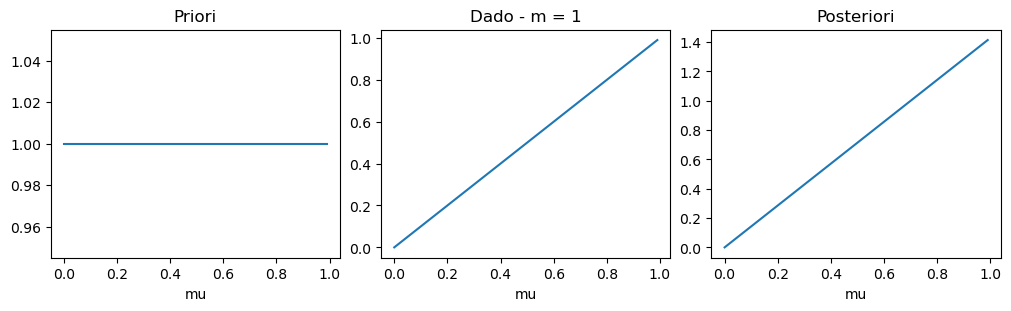

Jogada 2 com resultado = 1


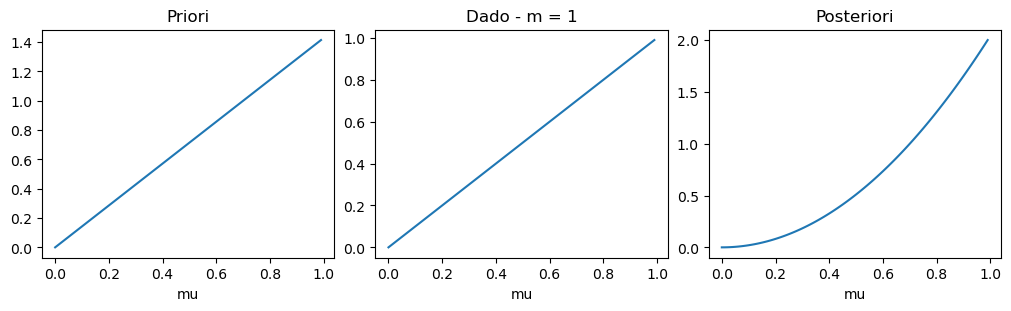

Jogada 3 com resultado = 0


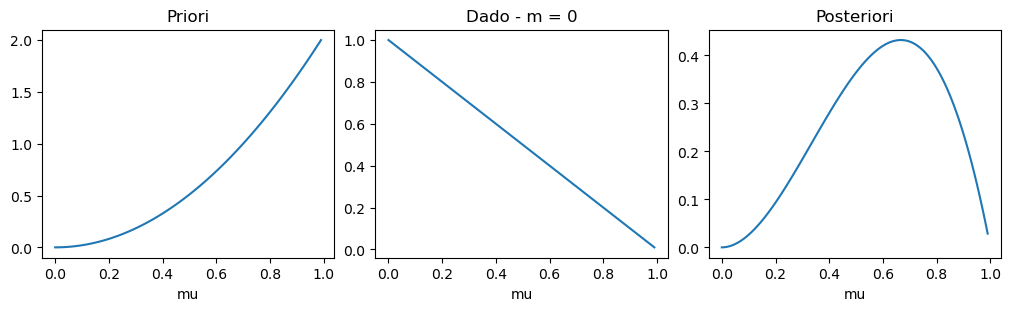

Jogada 4 com resultado = 0


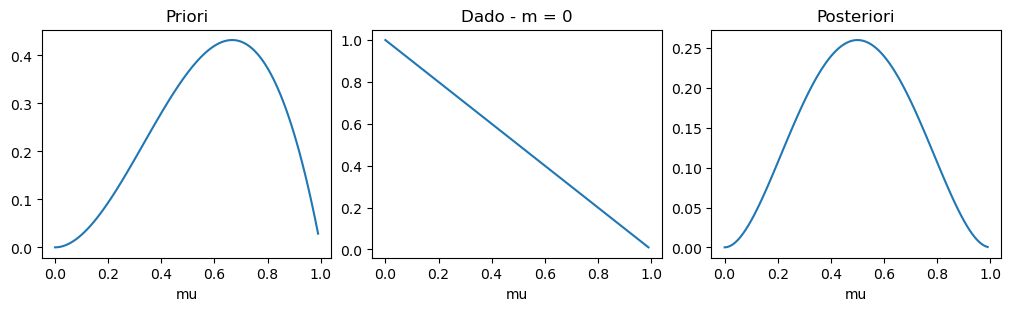

Jogada 5 com resultado = 1


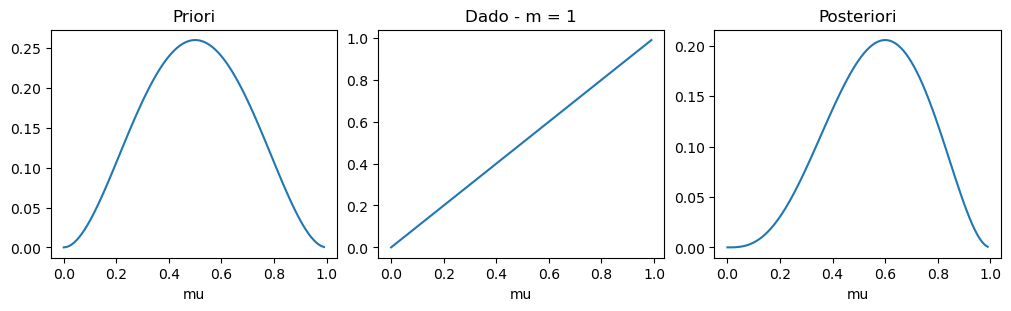

In [13]:
#Considerando 5 jogadas aleatórias
fpri= []                           #priori
lh = []                            #verossimilhança
fpos = []                          #posteriori



for k in range (len(m)):
    if k == 0:
        fpri += [beta.pdf(mu_b[i], a, b) for i in range(len(mu_b))]
        lh += [binom.pmf(m[k], N, mu_b[i]) for i in range(len(mu_b))]
        fpos += [binom.pmf(m[k], N, mu_b[i])*beta.pdf(mu_b[i], a, b)/prob for i in range(len(mu_b))]

        #plota resultados
        print('Jogada', k+1 ,'com resultado =', m[k])
        fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(10, 3), layout='constrained')
        ax1.plot(mu_b, fpri)
        ax1.set_xlabel("mu")  
        ax1.set_title("Priori")

        ax2.plot(mu_b,lh)
        ax2.set_xlabel("mu")  
        ax2.set_title("Dado - m = "+ str(m[k]))

        ax3.plot(mu_b, fpos)
        ax3.set_xlabel("mu")  
        ax3.set_title("Posteriori")
        plt.show()


        fpri = fpos                        #atualiza priori
        lh = []                            #zera joga para próxima rodada
        fpos = []                          #zera posteriori
    
    else:

        lh += [binom.pmf(m[k], N, mu_b[i]) for i in range(len(mu_b))]
        fpos += [binom.pmf(m[k], N, mu_b[i])*fpri[i]/prob for i in range(len(mu_b))]

        #plota resultados
        print('Jogada', k+1 ,'com resultado =', m[k])
        fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(10, 3), layout='constrained')
        ax1.plot(mu_b, fpri)
        ax1.set_xlabel("mu")  
        ax1.set_title("Priori")

        ax2.plot(mu_b,lh)
        ax2.set_xlabel("mu")  
        ax2.set_title("Dado - m = "+ str(m[k]))

        ax3.plot(mu_b, fpos)
        ax3.set_xlabel("mu")  
        ax3.set_title("Posteriori")
        plt.show()


        fpri = fpos                        #atualiza priori
        lh = []                            #zera joga para próxima rodada
        fpos = []                          #zera posteriori



In [14]:
#2º Caso
a = 2
b = 2

Jogada 1 com resultado = 1


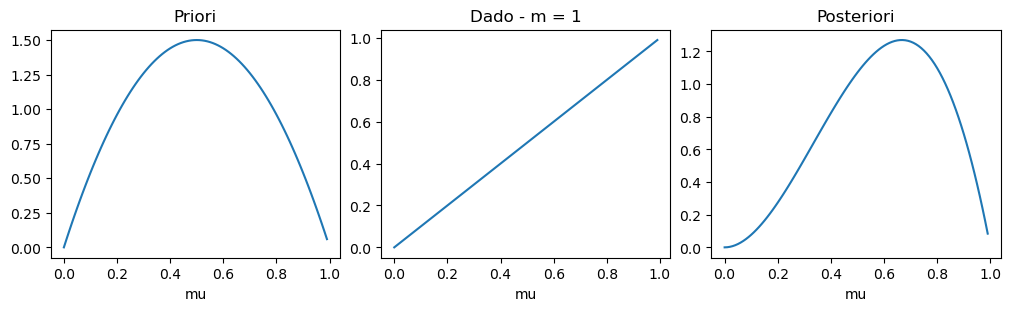

Jogada 2 com resultado = 1


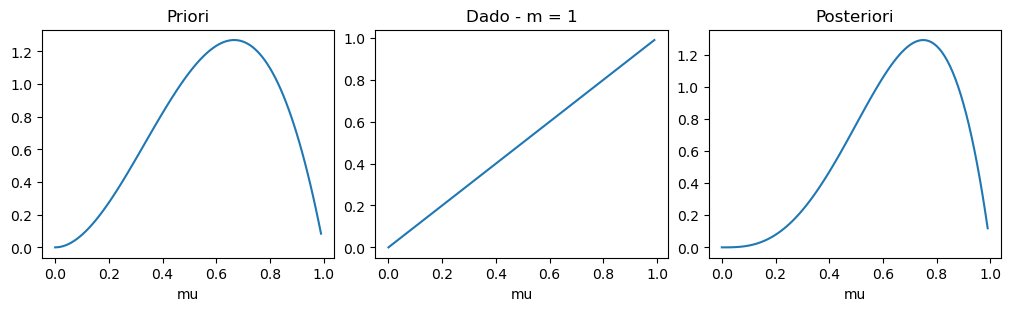

Jogada 3 com resultado = 0


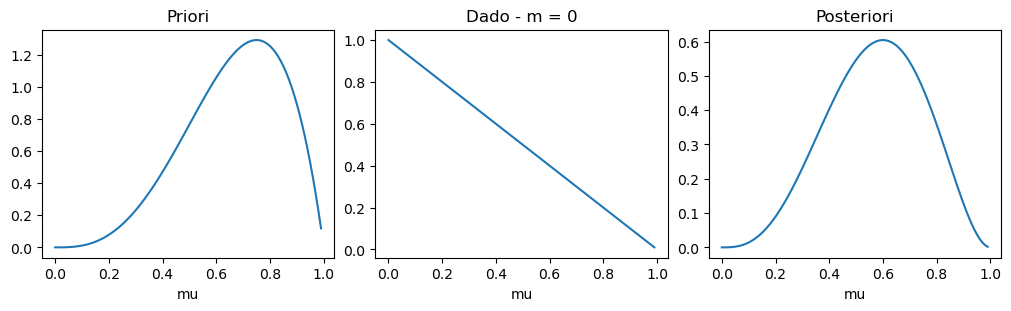

Jogada 4 com resultado = 0


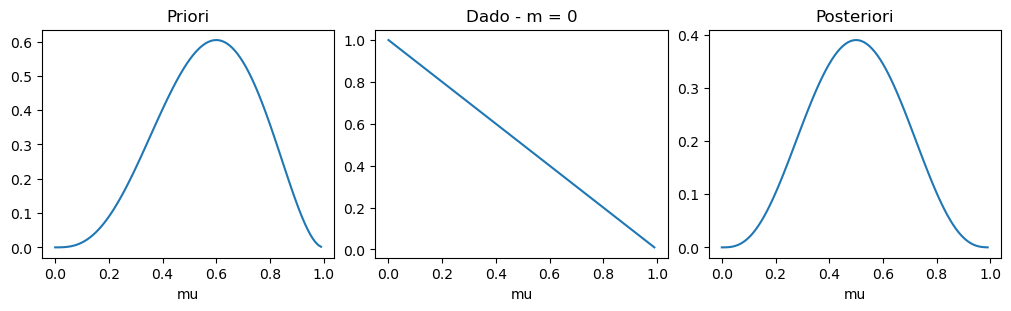

Jogada 5 com resultado = 1


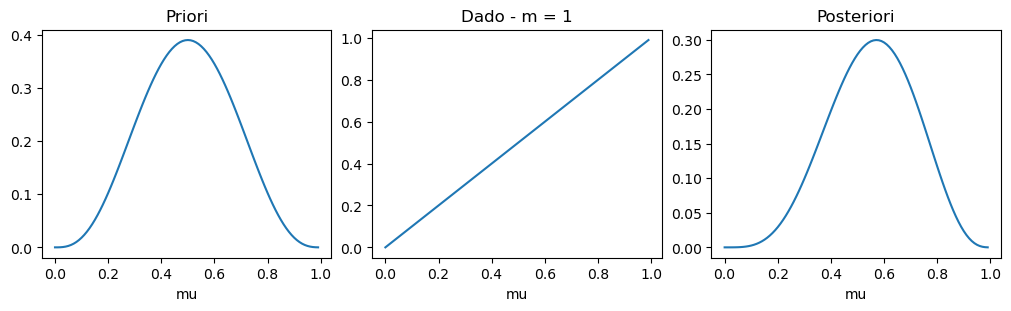

In [15]:
#Considerando 5 jogadas aleatórias
fpri= []                           #priori
lh = []                            #verossimilhança
fpos = []                          #posteriori



for k in range (len(m)):
    if k == 0:
        fpri += [beta.pdf(mu_b[i], a, b) for i in range(len(mu_b))]
        lh += [binom.pmf(m[k], N, mu_b[i]) for i in range(len(mu_b))]
        fpos += [binom.pmf(m[k], N, mu_b[i])*beta.pdf(mu_b[i], a, b)/prob for i in range(len(mu_b))]

        #plota resultados
        print('Jogada', k+1 ,'com resultado =', m[k])
        fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(10, 3), layout='constrained')
        ax1.plot(mu_b, fpri)
        ax1.set_xlabel("mu")  
        ax1.set_title("Priori")

        ax2.plot(mu_b,lh)
        ax2.set_xlabel("mu")  
        ax2.set_title("Dado - m = "+ str(m[k]))

        ax3.plot(mu_b, fpos)
        ax3.set_xlabel("mu")  
        ax3.set_title("Posteriori")
        plt.show()


        fpri = fpos                        #atualiza priori
        lh = []                            #zera joga para próxima rodada
        fpos = []                          #zera posteriori
    
    else:

        lh += [binom.pmf(m[k], N, mu_b[i]) for i in range(len(mu_b))]
        fpos += [binom.pmf(m[k], N, mu_b[i])*fpri[i]/prob for i in range(len(mu_b))]

        #plota resultados
        print('Jogada', k+1 ,'com resultado =', m[k])
        fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(10, 3), layout='constrained')
        ax1.plot(mu_b, fpri)
        ax1.set_xlabel("mu")  
        ax1.set_title("Priori")

        ax2.plot(mu_b,lh)
        ax2.set_xlabel("mu")  
        ax2.set_title("Dado - m = "+ str(m[k]))

        ax3.plot(mu_b, fpos)
        ax3.set_xlabel("mu")  
        ax3.set_title("Posteriori")
        plt.show()


        fpri = fpos                        #atualiza priori
        lh = []                            #zera joga para próxima rodada
        fpos = []                          #zera posteriori

